In [1]:
# imports the require libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Get the data using the yahoo finance API

# read in the data using the yahoo finance API
name = (input("Enter ticker of your choice")).upper()
data = yf.download(name, start="2002-01-01")
data

Enter ticker of your choice amd


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,16.280001,16.410000,15.950000,16.389999,16.389999,4475400
2002-01-03,16.719999,19.650000,16.719999,19.370001,19.370001,14836600
2002-01-04,19.900000,20.200001,19.120001,20.000000,20.000000,14737700
2002-01-07,20.450001,20.600000,19.530001,19.980000,19.980000,9822300
2002-01-08,19.980000,20.070000,19.650000,19.900000,19.900000,5880300
...,...,...,...,...,...,...
2022-11-30,73.379997,77.699997,72.809998,77.629997,77.629997,88391400
2022-12-01,78.309998,79.230003,76.440002,77.480003,77.480003,59833400
2022-12-02,75.050003,76.279999,73.650002,74.980003,74.980003,64325200


In [3]:
# Prepare Data

# Add a few columns to the DataFrame

# Compute the log returns.
data["log_return"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))

# Add a column for the calendar day of the month (1 – 31) and a column for the year.

data["day_of_month"] = data.index.day
data["year"] = data.index.year
data

,Open,High,Low,Close,Adj Close,Volume,log_return,day_of_month,year
Date,,,,,,,,,
2002-01-02,16.280001,16.410000,15.950000,16.389999,16.389999,4475400,NaN,2,2002
2002-01-03,16.719999,19.650000,16.719999,19.370001,19.370001,14836600,0.167054,3,2002
2002-01-04,19.900000,20.200001,19.120001,20.000000,20.000000,14737700,0.032007,4,2002
2002-01-07,20.450001,20.600000,19.530001,19.980000,19.980000,9822300,-0.001001,7,2002
2002-01-08,19.980000,20.070000,19.650000,19.900000,19.900000,5880300,-0.004012,8,2002
...,...,...,...,...,...,...,...,...,...
2022-11-30,73.379997,77.699997,72.809998,77.629997,77.629997,88391400,0.056166,30,2022
2022-12-01,78.309998,79.230003,76.440002,77.480003,77.480003,59833400,-0.001934,1,2022
2022-12-02,75.050003,76.279999,73.650002,74.980003,74.980003,64325200,-0.032798,2,2022


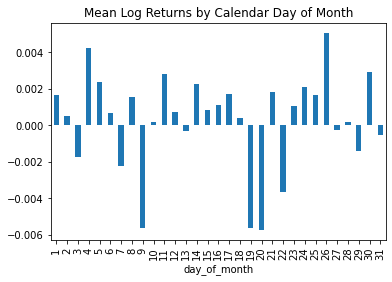

In [4]:
# Calculate the mean return on every day of the month.
grouped_by_day = data.groupby("day_of_month").log_return.mean()

# Plot mean return 
grouped_by_day_plot = grouped_by_day.plot.bar(title=f"{name} Mean Log Returns by Calendar Day of Month");
grouped_by_day_plot

# Save the figure.
plt.savefig(f"./Images/{name}groupedByDay.jpg")


# Build A Simple Trading Strategy

Let’s build a naive strategy:

Buy and hold the asset during the last week of the month
Short and hold the asset during the first week of the month
Simple.

This code creates 3 new columns:

    - first_week_returns – the daily log return if it’s between the 1st and 7th day of the month, otherwise 0
    
    - last_week_returns – the daily log return if it’s on or after the 23rd day of the month, otherwise 0
    
    - last_week_less_first_week – the difference between last_week_returns and first_week_returns
    last_week_less_first_week represents the returns from our naive strategy. It’s basically saying “go long TLT the last week” and “go short TLT the first week”.

In [5]:
data["first_week_returns"] = 0.0
data.loc[data.day_of_month <= 7, "first_week_returns"] = data[
    data.day_of_month <= 7
].log_return

data["last_week_returns"] = 0.0
data.loc[data.day_of_month >= 23, "last_week_returns"] = data[
    data.day_of_month >= 23
].log_return

data["last_week_less_first_week"] = data.last_week_returns - data.first_week_returns

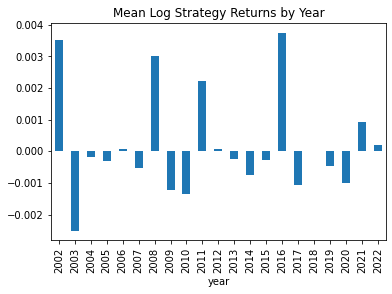

In [6]:
# Plot Returns
# Sum up the returns by year and plot them.

mean_log_returns_by_year_plot = (
    data.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title=f"{name} Mean Log Strategy Returns by Year")
);

mean_log_returns_by_year_plot

# Save the figure.
plt.savefig(f"./Images/{name}meanLogReturnsByYear.jpg")

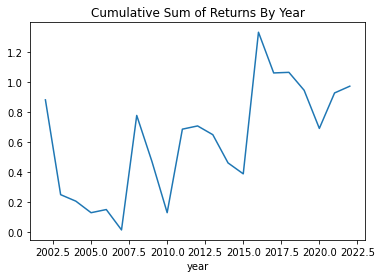

In [7]:
# cumulative returns by year.

cumulative_returns_by_year_plot = (
    data.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title=f"{name} Cumulative Sum of Returns By Year")
);
cumulative_returns_by_year_plot

# Save the figure.
plt.savefig(f"./Images/{name}cumulativeReturnsByYear.jpg")

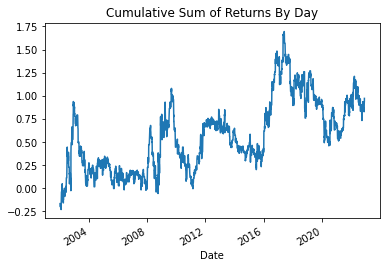

In [8]:
# Cumulative returns by day.
cumulative_returns_by_day_plot = data.last_week_less_first_week.cumsum().plot(title=f"{name} Cumulative Sum of Returns By Day");

cumulative_returns_by_day_plot


# Save the figure.
plt.savefig(f"./Images/{name}CumulativeReturnsByDay.jpg")

This is NOT investment advice, but there is evidence that this effect is profitable. It’s worth spending more time exploring it more deeply.